<a href="https://colab.research.google.com/github/tristontan/StatSmith/blob/main/tourist_locals_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')

!pip install gspread oauth2client
from google.colab import auth
auth.authenticate_user()

FROM DSA3101_(A)_Q1_

Unique values and counts in 'Tourist/Local':
Tourist/Local
2    6344
1    3615
Name: count, dtype: int64

Unique values and counts in 'Rating experience':
Rating experience
4    5137
3    4157
5     559
2     106
Name: count, dtype: int64


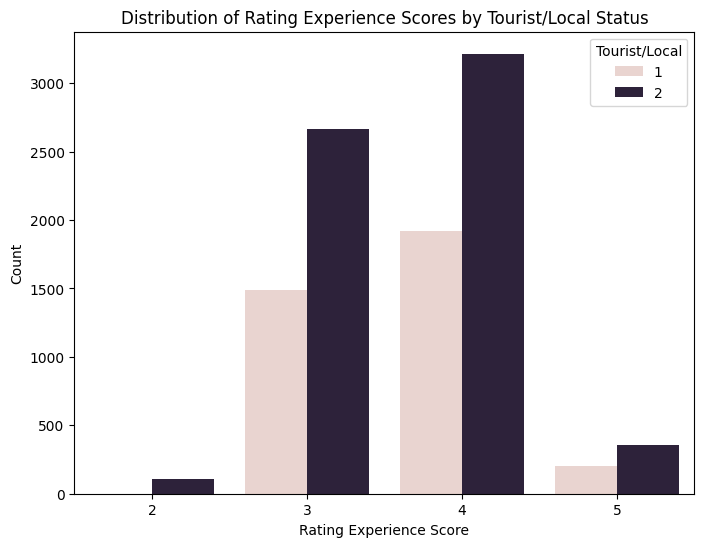

In [3]:
print("Unique values and counts in 'Tourist/Local':")
print(data['Tourist/Local'].value_counts())

print("\nUnique values and counts in 'Rating experience':")
print(data['Rating experience'].value_counts())

# PLOT COUNT PLOT
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating experience', hue='Tourist/Local', data=data)
plt.title("Distribution of Rating Experience Scores by Tourist/Local Status")
plt.xlabel("Rating Experience Score")
plt.ylabel("Count")
plt.show()

FINDING KEY DRIVERS OF SATISFACTION FOR TOURISTS


                            OLS Regression Results                            
Dep. Variable:      Rating experience   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     235.3
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          5.39e-322
Time:                        16:43:46   Log-Likelihood:                -2433.3
No. Observations:                3615   AIC:                             4885.
Df Residuals:                    3606   BIC:                             4940.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

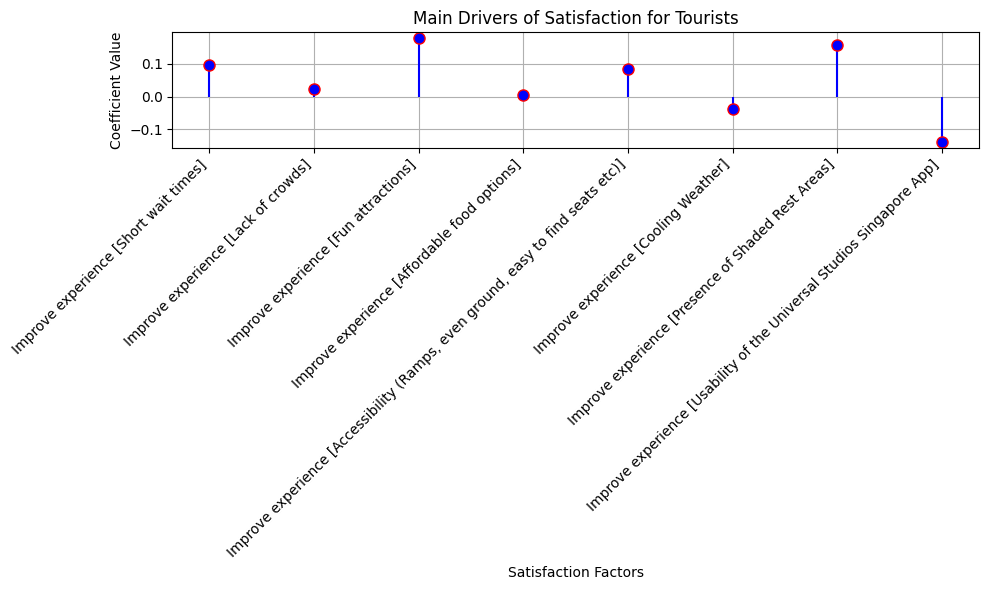

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

tourist_data = data[data['Tourist/Local'] == 1]

satisfaction_factors = [
    'Improve experience [Short wait times]',
    'Improve experience [Lack of crowds]',
    'Improve experience [Fun attractions]',
    'Improve experience [Affordable food options]',
    'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
    'Improve experience [Cooling Weather]',
    'Improve experience [Presence of Shaded Rest Areas]',
    'Improve experience [Usability of the Universal Studios Singapore App]'
]

X = tourist_data[satisfaction_factors]
y = tourist_data['Rating experience']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

coef = model.params
p_values = model.pvalues

results_df = pd.DataFrame({
    'Factors': coef.index,
    'Coefficient': coef.values,
    'P-Value': p_values.values
}).set_index('Factors')

results_df = results_df.loc[satisfaction_factors]

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(results_df['Coefficient'], basefmt=" ", markerfmt="o", linefmt="-")
plt.setp(markerline, markersize=8, color="blue", markeredgecolor="red")
plt.setp(stemlines, color="blue")
plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
plt.title('Main Drivers of Satisfaction for Tourists')
plt.xlabel('Satisfaction Factors')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

FINDING KEY DRIVERS OF SATISFACTION FOR LOCALS

                            OLS Regression Results                            
Dep. Variable:      Rating experience   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     90.52
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          7.36e-143
Time:                        16:43:18   Log-Likelihood:                -5627.8
No. Observations:                6344   AIC:                         1.127e+04
Df Residuals:                    6335   BIC:                         1.133e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

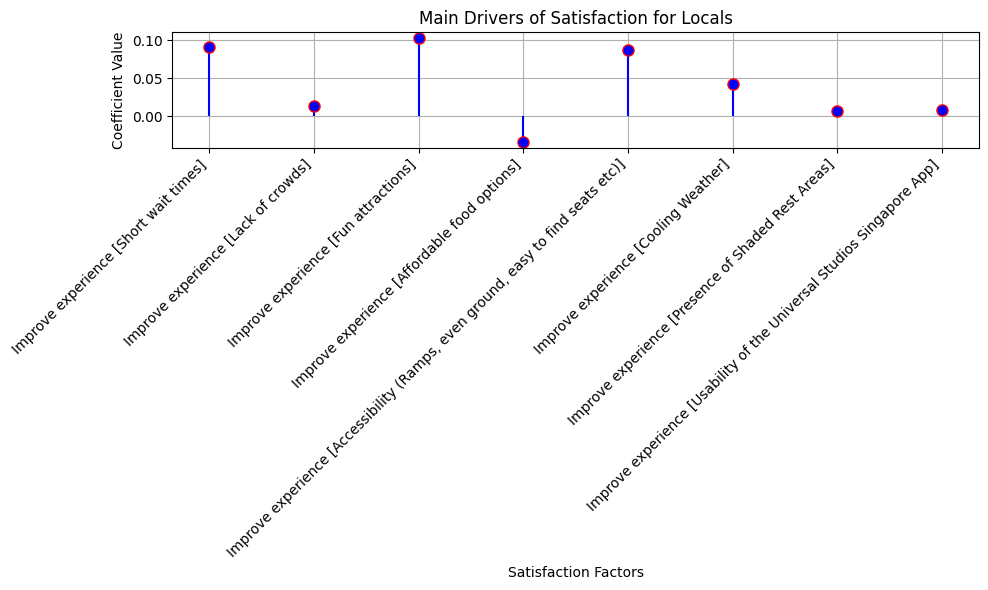

In [11]:
locals_data = data[data['Tourist/Local'] == 2]

satisfaction_factors = [
    'Improve experience [Short wait times]',
    'Improve experience [Lack of crowds]',
    'Improve experience [Fun attractions]',
    'Improve experience [Affordable food options]',
    'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
    'Improve experience [Cooling Weather]',
    'Improve experience [Presence of Shaded Rest Areas]',
    'Improve experience [Usability of the Universal Studios Singapore App]'
]

X = locals_data[satisfaction_factors]
y = locals_data['Rating experience']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

coef = model.params
p_values = model.pvalues

results_df = pd.DataFrame({
    'Factors': coef.index,
    'Coefficient': coef.values,
    'P-Value': p_values.values
}).set_index('Factors')

results_df = results_df.loc[satisfaction_factors]

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(results_df['Coefficient'], basefmt=" ", markerfmt="o", linefmt="-")
plt.setp(markerline, markersize=8, color="blue", markeredgecolor="red")
plt.setp(stemlines, color="blue")
plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
plt.title('Main Drivers of Satisfaction for Locals')
plt.xlabel('Satisfaction Factors')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

FINDING KEY DRIVERS OF DISSATISFACTION FOR TOURISTS

                            OLS Regression Results                            
Dep. Variable:      Rating experience   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     285.8
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:42:48   Log-Likelihood:                -2304.8
No. Observations:                3615   AIC:                             4628.
Df Residuals:                    3606   BIC:                             4683.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

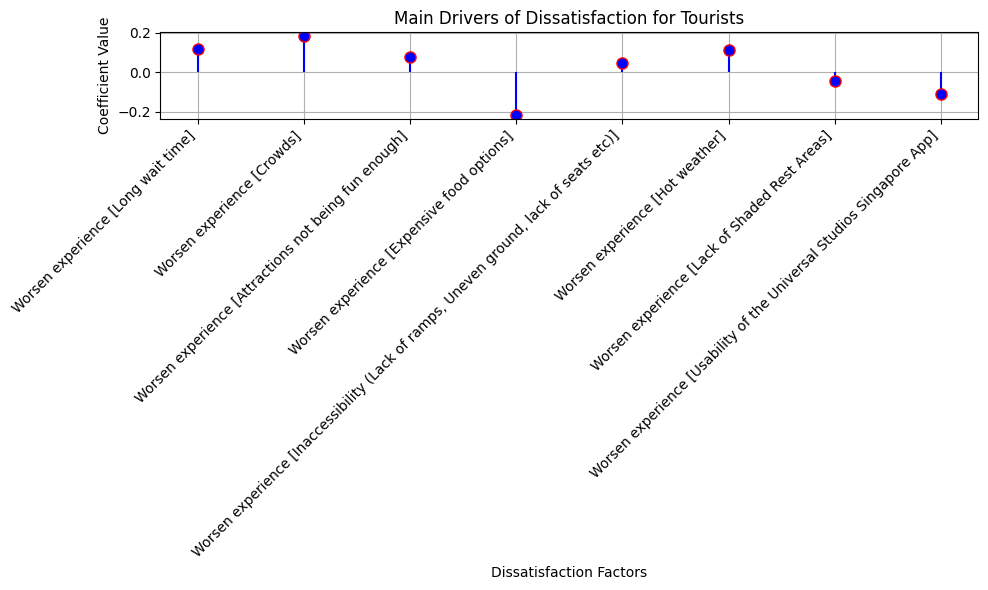

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

tourist_data = data[data['Tourist/Local'] == 1]

dissatisfaction_factors = [
    'Worsen experience [Long wait time]',
    'Worsen experience [Crowds]',
    'Worsen experience [Attractions not being fun enough]',
    'Worsen experience [Expensive food options]',
    'Worsen experience [Inaccessibility (Lack of ramps, Uneven ground, lack of seats etc)]',
    'Worsen experience [Hot weather]',
    'Worsen experience [Lack of Shaded Rest Areas]',
    'Worsen experience [Usability of the Universal Studios Singapore App]'
]


X = tourist_data[dissatisfaction_factors]
y = tourist_data['Rating experience']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

coef = model.params
p_values = model.pvalues

results_df = pd.DataFrame({
    'Factors': coef.index,
    'Coefficient': coef.values,
    'P-Value': p_values.values
}).set_index('Factors')

results_df = results_df.loc[dissatisfaction_factors]

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(results_df['Coefficient'], basefmt=" ", markerfmt="o", linefmt="-")
plt.setp(markerline, markersize=8, color="blue", markeredgecolor="red")
plt.setp(stemlines, color="blue")
plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
plt.title('Main Drivers of Dissatisfaction for Tourists')
plt.xlabel('Dissatisfaction Factors')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

FINDING KEY DRIVERS OF DISSATISFACTION FOR LOCALS


                            OLS Regression Results                            
Dep. Variable:      Rating experience   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     67.16
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.66e-106
Time:                        16:42:20   Log-Likelihood:                -5712.9
No. Observations:                6344   AIC:                         1.144e+04
Df Residuals:                    6335   BIC:                         1.150e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

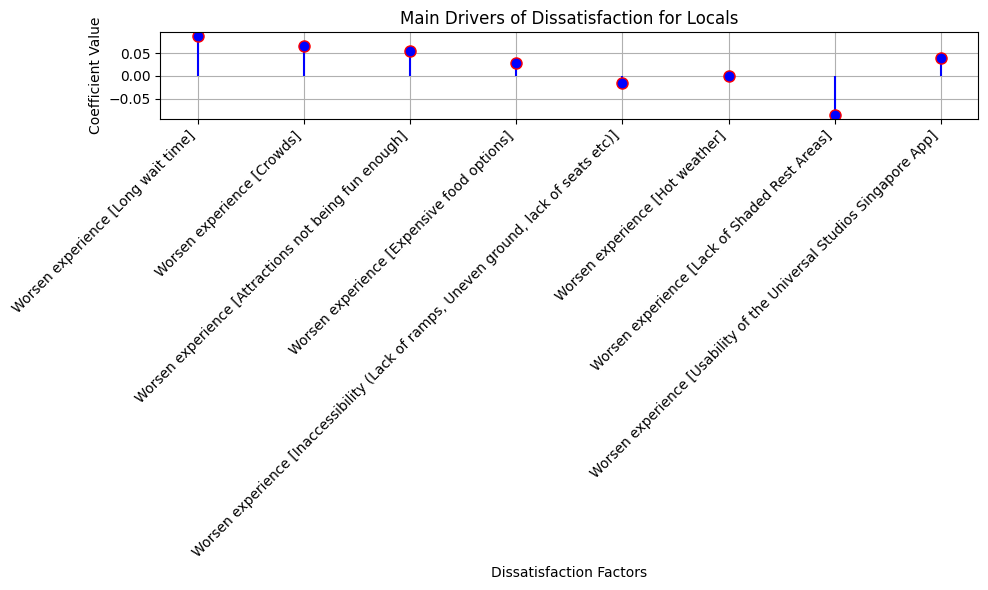

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

locals_data = data[data['Tourist/Local'] == 2]

dissatisfaction_factors = [
    'Worsen experience [Long wait time]',
    'Worsen experience [Crowds]',
    'Worsen experience [Attractions not being fun enough]',
    'Worsen experience [Expensive food options]',
    'Worsen experience [Inaccessibility (Lack of ramps, Uneven ground, lack of seats etc)]',
    'Worsen experience [Hot weather]',
    'Worsen experience [Lack of Shaded Rest Areas]',
    'Worsen experience [Usability of the Universal Studios Singapore App]'
]

X = locals_data[dissatisfaction_factors]
y = locals_data['Rating experience']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

coef = model.params
p_values = model.pvalues

results_df = pd.DataFrame({
    'Factors': coef.index,
    'Coefficient': coef.values,
    'P-Value': p_values.values
}).set_index('Factors')

results_df = results_df.loc[dissatisfaction_factors]

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(results_df['Coefficient'], basefmt=" ", markerfmt="o", linefmt="-")
plt.setp(markerline, markersize=8, color="blue", markeredgecolor="red")
plt.setp(stemlines, color="blue")
plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
plt.title('Main Drivers of Dissatisfaction for Locals')
plt.xlabel('Dissatisfaction Factors')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()